In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)},style='whitegrid')
plt.rcParams['figure.figsize'] = (15,7)

In [2]:
DATA_PATH = 'data/'

TRAIN_FEATURES = os.path.join(DATA_PATH, 'train_new_features.csv')

In [3]:
train_df = pd.read_csv(TRAIN_FEATURES, index_col=0, encoding='utf-8')

In [4]:
train_df.head(2)

,text,target,text_cleaned,preprocessed_text,sentence_count,word_count,stop_word_count,stop_word_share,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,polarity_raw,subjectivity_raw,unique_word_count,unique_word_share,polarity,subjectivity,DT,NN,PRP$,NNS,VBP,IN,MD,VB,JJ,PRP,JJS,VBN,VBD,TO,VBG,CC,RB,EX,VBZ,CD,WP,RP,JJR,WRB,FW,WDT,NNP,RBR,RBS,PDT,SYM,UH,WP$
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,our deeds are the reason of this earthquake may allah forgive us all,deed reason earthquak may allah forgiv us,1,13,6,0.461538,0,4.384615,69,1,1,0,0.0,0.0,7,1.0,0.0,0.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la rong sask canada,1,7,0,0.000000,0,4.571429,38,1,0,0,0.1,0.4,7,1.0,0.1,0.4,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data preparation

In [5]:
train_df.drop(['text', 'text_cleaned', 'preprocessed_text'], axis=1, inplace=True)
print("Number of columns in train set: {}".format(len(list(train_df))))

Number of columns in train set: 50


In [6]:
if train_df.isnull().any().any():
    print('Found missing values in data')
else:
    print('No missing values in data')

No missing values in data


In [7]:
train_df.describe()

,target,sentence_count,word_count,stop_word_count,stop_word_share,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,polarity_raw,subjectivity_raw,unique_word_count,unique_word_share,polarity,subjectivity,DT,NN,PRP$,NNS,VBP,IN,MD,VB,JJ,PRP,JJS,VBN,VBD,TO,VBG,CC,RB,EX,VBZ,CD,WP,RP,JJR,WRB,FW,WDT,NNP,RBR,RBS,PDT,SYM,UH,WP$
count,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000
mean,0.427926,1.124601,14.875266,4.502261,0.280452,0.624601,6.132392,100.908511,6.844814,0.439628,0.365691,0.048576,0.299450,8.405452,0.976084,0.041529,0.222459,0.965559,4.062766,0.197872,0.966755,0.526463,1.470612,0.150399,0.559840,1.336569,0.427926,0.047739,0.322340,0.411569,0.267553,0.359574,0.264229,0.592420,0.018351,0.380585,0.053457,0.054521,0.091489,0.038165,0.083644,0.007181,0.031516,0.007979,0.022872,0.004787,0.012367,0.000266,0.002926,0.000266
std,0.494811,0.677596,5.729471,3.399850,0.156292,0.663614,1.676812,33.808378,4.605344,1.088857,0.723179,0.267094,0.326784,3.361311,0.064667,0.230508,0.295309,1.079256,2.293250,0.494358,1.033145,0.780867,1.227403,0.401636,0.849264,1.189301,0.790364,0.221188,0.585166,0.723073,0.523129,0.618003,0.523929,0.904082,0.139092,0.621763,0.244234,0.236807,0.310531,0.213286,0.301697,0.104183,0.180706,0.091914,0.149506,0.070929,0.110525,0.016307,0.058731,0.016307
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.250000,7.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,2.000000,0.166667,0.000000,4.875000,77.000000,3.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,15.000000,4.000000,0.285714,1.000000,5.942810,107.000000,6.000000,0.000000,0.000000,0.000000,0.200000,8.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,19.000000,7.000000,0.400000,1.000000,7.058824,133.000000,10.000000,0.000000,1.000000,0.125000,0.535714,11.000000,1.000000,0.062500,0.450000,2.000000,6.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,12.000000,31.000000,19.000000,0.777778,4.000000,19.333333,157.000000,61.000000,13.000000,8.000000,1.000000,1.000000,21.000000,1.000000,1.000000,1.000000,6.000000,17.000000,6.000000,8.000000,6.000000,8.000000,3.000000,6.000000,8.000000,6.000000,2.000000,4.000000,5.000000,4.000000,4.00

In [8]:
train = train_df.drop('target', axis=1) # load the dataset as a pandas data frame
y = train_df['target'] # define the target variable (dependent variable) as y

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=13, stratify=y)

In [9]:
X_train.shape, X_test.shape

((5264, 49), (2256, 49))

## Data scaling

In [10]:
sc = MinMaxScaler()

X_train_scaled = X_train.copy()
X_train_scaled.loc[:, list(X_train_scaled)] = sc.fit_transform(X_train_scaled[list(X_train_scaled)])

X_test_scaled = X_test.copy()
X_test_scaled.loc[:, list(X_test_scaled)] = sc.transform(X_test_scaled[list(X_test_scaled)])

In [11]:
X_train_scaled.describe()

,sentence_count,word_count,stop_word_count,stop_word_share,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,polarity_raw,subjectivity_raw,unique_word_count,unique_word_share,polarity,subjectivity,DT,NN,PRP$,NNS,VBP,IN,MD,VB,JJ,PRP,JJS,VBN,VBD,TO,VBG,CC,RB,EX,VBZ,CD,WP,RP,JJR,WRB,FW,WDT,NNP,RBR,RBS,PDT,SYM,UH,WP$
count,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.00000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.00000,5264.000000,5264.00000
mean,0.011450,0.466629,0.239002,0.374356,0.206497,0.252581,0.630566,0.112478,0.033844,0.046780,0.522425,0.301988,0.373566,0.973859,0.519647,0.222506,0.162329,0.255972,0.032516,0.120607,0.086943,0.212413,0.051798,0.094605,0.170213,0.072853,0.023556,0.081592,0.084422,0.066869,0.09223,0.065682,0.100684,0.009309,0.095555,0.016591,0.018174,0.029319,0.018712,0.026342,0.001852,0.015767,0.004274,0.022416,0.001995,0.013298,0.00038,0.000950,0.00038
std,0.065084,0.191162,0.178907,0.206775,0.218955,0.117629,0.225205,0.074874,0.083618,0.090204,0.133902,0.326142,0.168249,0.069301,0.115561,0.293214,0.181091,0.143734,0.081310,0.128784,0.129094,0.175568,0.135906,0.142695,0.150026,0.132875,0.110342,0.147309,0.144992,0.130286,0.15639,0.130753,0.153236,0.069667,0.155988,0.079445,0.078697,0.102152,0.105345,0.096284,0.027721,0.090590,0.048055,0.148048,0.032993,0.114558,0.01949,0.023856,0.01949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,0.333333,0.105263,0.222222,0.000000,0.163669,0.473333,0.049180,0.000000,0.000000,0.500000,0.000000,0.250000,1.000000,0.500000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,0.000000,0.466667,0.210526,0.380952,0.333333,0.239466,0.673333,0.098361,0.000000,0.000000,0.500000,0.200000,0.400000,1.000000,0.500000,0.000000,0.166667,0.250000,0.000000,0.125000,0.000000,0.142857,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
75%,0.000000,0.600000,0.368421,0.533333,0.333333,0.320779,0.846667,0.163934,0.000000,0.125000,0.562500,0.535714,0.500000,1.000000,0.531250,0.450000,0.333333,0.375000,0.000000,0.250000,0.166667,0.285714,0.000000,0.166667,0.250000,0.166667,0.000000,0.250000,0.200000,0.000000,0.25000,0.000000,0.166667,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

## Features distribution analysis (on scaled data)

In [12]:
def feature_plot(features, df_train, df_test):
    train_copy = df_train.copy()
    train_copy.loc[:,'target'] = y_train
    disaster_tweets = train_copy.loc[:,'target'] == 1

    fig, axes = plt.subplots(ncols=1, nrows=len(features), 
                             figsize=(20, 400), dpi=100)

    for i, feature in enumerate(features):
        sns.distplot(train_copy.loc[~disaster_tweets][feature], 
                     label='Not Disaster', ax=axes[i], color='green', kde_kws={'bw':'2'})
        sns.distplot(train_copy.loc[disaster_tweets][feature], 
                     label='Disaster', ax=axes[i], color='red', kde_kws={'bw':'2'})
    
        for j in range(2):
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='x', labelsize=13)
            axes[i].tick_params(axis='y', labelsize=13)
            axes[i].legend()
            axes[i].set_xlim(-1, 1)
    
        axes[i].set_title(f'{feature} Target Distribution in Training Set', fontsize=14)
    
    plt.show()

/home/asia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/asia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


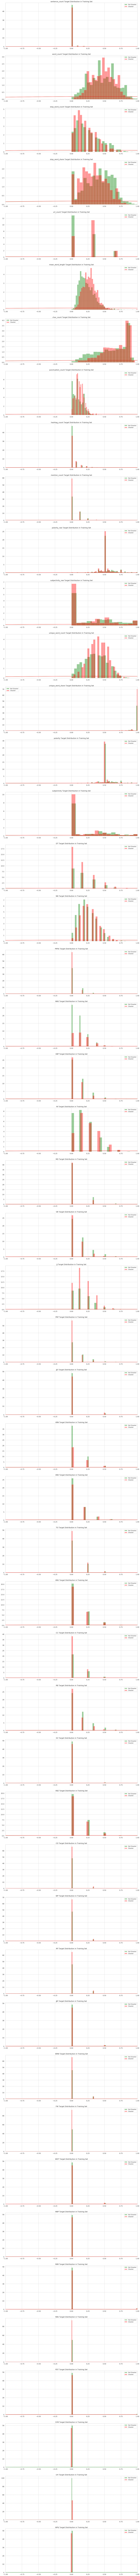

In [13]:
feature_plot(features=list(X_train_scaled),
             df_train=X_train_scaled,
             df_test=X_test_scaled)

There are no features that can separate two classes.

## Feature selection by low varience

The features with the lowest variances.

In [14]:
feature_variance = X_train_scaled.var().sort_values()
feature_variance[:15]

SYM                  0.000380
WP$                  0.000380
UH                   0.000569
FW                   0.000768
RBS                  0.001089
NNP                  0.002309
sentence_count       0.004236
unique_word_share    0.004803
EX                   0.004853
punctuation_count    0.005606
WP                   0.006193
CD                   0.006312
PRP$                 0.006611
hashtag_count        0.006992
mention_count        0.008137
dtype: float64

Based on this, we can drop the features with variance less than some threshold $k$. We chose $k = 0.005$, because 12 features with variance below this threshold are constant or almost constant, but it seems that some features ('unique_word_share', 'stop_word_share', 'polarity') may carry some useful information.

In [15]:
drop_low_varience = list(feature_variance.index[:15])
drop_low_varience

['SYM',
 'WP$',
 'UH',
 'FW',
 'RBS',
 'NNP',
 'sentence_count',
 'unique_word_share',
 'EX',
 'punctuation_count',
 'WP',
 'CD',
 'PRP$',
 'hashtag_count',
 'mention_count']

## Feature selection by high correlation

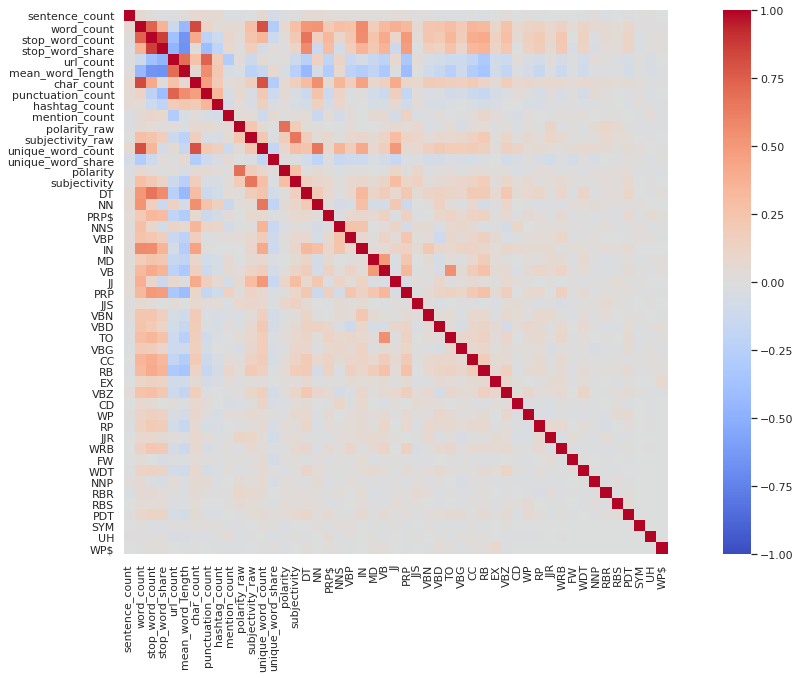

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(X_train_scaled.corr(method='spearman'), 
            xticklabels=X_train_scaled.corr().columns, 
            yticklabels=X_train_scaled.corr().columns,
            cmap='coolwarm',
            square=True,
            center=0,
            vmin=-1)
plt.show()

Get correlated pairs of features.

In [17]:
corr_series = X_train_scaled.corr(method='spearman').abs().unstack().sort_values(ascending=False)

corr_index = [(feature_1, feature_2) 
              for feature_1, feature_2 in corr_series.index 
              if feature_1 != feature_2]
corr_features = corr_series.loc[corr_index]
corr_features[:15]

stop_word_count    stop_word_share      0.864187
stop_word_share    stop_word_count      0.864187
word_count         char_count           0.828399
char_count         word_count           0.828399
word_count         unique_word_count    0.807648
unique_word_count  word_count           0.807648
char_count         unique_word_count    0.801334
unique_word_count  char_count           0.801334
word_count         stop_word_count      0.742186
stop_word_count    word_count           0.742186
punctuation_count  url_count            0.738869
url_count          punctuation_count    0.738869
                   mean_word_length     0.696273
mean_word_length   url_count            0.696273
polarity_raw       polarity             0.682382
dtype: float64

There are some features which are linearly dependent (correlation > |0.8|).
Let's exclude one from each pair.

In [18]:
drop_high_corr = ['char_count', 'stop_word_share', 'unique_word_count']

## Feature selection with ANOVA correlation coefficient

Feature selection is performed using ANOVA F measure via the *f_classif()* function.

In [19]:
selector_ftest = SelectKBest(score_func=f_classif, k='all')

In [20]:
selector_ftest.fit(X_train_scaled, y_train)
ftest_scores = selector_ftest.pvalues_

For each feature, we plot the p-values for the univariate feature selection.

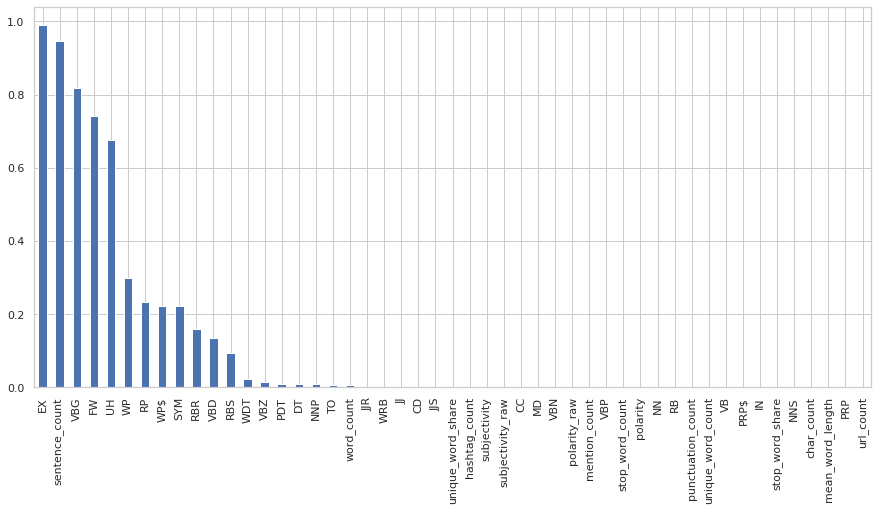

In [21]:
p_values_ftest = pd.Series(ftest_scores,
                           index = X_train_scaled.columns)
p_values_ftest.sort_values(ascending = False , inplace = True)
p_values_ftest.plot.bar()

In [22]:
alpha_ftest = 0.05

ftest_low = p_values_ftest.loc[p_values_ftest > 1-alpha_ftest]

In [23]:
drop_low_ftest = list(ftest_low.index)
drop_low_ftest

['EX']

Since **['EX']** have high p-value, this variable is independent of the response and can not be considered for model training.

## Perform Feature Selection

In [24]:
print("List of features with low varience: {}\n".format(drop_low_varience))
print("List of features with high correlation: {}".format(drop_high_corr))
print("List of features with low F-test value: {}\n".format(drop_low_ftest))

List of features with low varience: ['SYM', 'WP$', 'UH', 'FW', 'RBS', 'NNP', 'sentence_count', 'unique_word_share', 'EX', 'punctuation_count', 'WP', 'CD', 'PRP$', 'hashtag_count', 'mention_count']

List of features with high correlation: ['char_count', 'stop_word_share', 'unique_word_count']
List of features with low F-test value: ['EX']



## CONCLUSIONS

EDA on tabular data after scaling showed that some of the features were constant or almost constant (because they presumably contained no useful information), and some of the features were linearly dependent, they were also excluded because it might have caused troubles in training linear models such as Logistic Regression.